## Plot Heatmaps

In [1]:
import os, shutil, glob
os.getcwd()

import pandas as pd 
import numpy as np

import re, math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#from mpl_toolkits.mplot3d import Axes3D
import matplotlib  as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("white")

from itertools import cycle
import datetime
import gc

#matplotlib inline

In [39]:
figformat = 'png'
dpi = 150

In [3]:
OutputDir = input("Enter name for output folder: ") # 
if not os.path.exists(OutputDir): 
    os.makedirs(OutputDir)

In [40]:
BaseDir = './2D_analysis/ImageMedianFeatures/'
sorted(os.listdir(BaseDir))

['ImageMediansAllPlates.csv',
 'ImageMediansPlatecolo44-v1-FA-P017365-CACO2-48h-P1-L1.csv',
 'ImageMediansPlatecolo44-v1-FA-P017366-CACO2-48h-P1-L2.csv',
 'ImageMediansPlatecolo44-v1-FA-P017367-CACO2-48h-P2-L1.csv',
 'ImageMediansPlatecolo44-v1-FA-P017368-CACO2-48h-P2-L2.csv']

In [41]:
df = pd.read_csv('{}/ImageMediansAllPlates.csv'.format(BaseDir), sep=';' , index_col=0)
df.head(1)

,ImageNumber_nuclei,ObjectNumber_nuclei,Metadata_Site_nuclei,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,...,RadialDistribution_ZernikePhase_illumSYTO_8_0_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_2_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_4_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_6_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_8_8_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_1_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_3_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_7_cytoplasm,RadialDistribution_ZernikePhase_illumSYTO_9_9_cytoplasm
ImageID,,,,,,,,,,,,,,,,,,,,,
colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02_1,1.0,53.5,1.0,1860.0,2597.0,1062.5,806.5,1017.5,764.5,1037.132364,...,1.570796,-0.803829,0.171201,-0.542558,1.492466,-0.100184,0.658361,-0.035433,0.043947,0.426303


In [42]:
df["barcode"] = df.index.str[:40]
df["well_id"] = df.index.str[-5:-2]
##df['plateWell'] = df['barcode'] + '_' + df['well_id']
df["plateWell"] = df["barcode"]
df["site"] = df.index.str[-1:]

In [43]:
Layout = pd.read_csv("2D_analysis/colopaint44-v1-metadata.csv", sep=",")
Layout.head(1)

,layout_id,well_id,batch_id,solvent,stock_conc,stock_conc_unit,cmpd_vol,cmpd_vol_unit,well_vol,well_vol_unit,pert_type,cmpd_conc,cmpd_conc_unit,batchid,cbkid,libid,libtxt,smiles,inchi,inkey
0,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,PHB000015,dmso,10.0,mM,7.5,nL,30,uL,poscon,2.5,uM,PHB000015,[tetr],[tetr],pharmb_io,NaN,NaN,NaN


In [44]:
Layout["plateWell"] = Layout["layout_id"] + "_" + Layout["well_id"]
Layout.head(1)

,layout_id,well_id,batch_id,solvent,stock_conc,stock_conc_unit,cmpd_vol,cmpd_vol_unit,well_vol,well_vol_unit,...,cmpd_conc,cmpd_conc_unit,batchid,cbkid,libid,libtxt,smiles,inchi,inkey,plateWell
0,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,PHB000015,dmso,10.0,mM,7.5,nL,30,uL,...,2.5,uM,PHB000015,[tetr],[tetr],pharmb_io,NaN,NaN,NaN,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02


In [45]:
cmpd_concDict = dict(zip(Layout.plateWell, Layout.cmpd_conc))
pert_typeDict = dict(zip(Layout.plateWell, Layout.pert_type))
cbkidDict = dict(zip(Layout.plateWell, Layout.cbkid))

In [46]:
labels = ["cmpd_conc", "pert_type", "cbkid"]
for a in labels:
    df[a] = df["plateWell"].map(eval("{}Dict".format(a)))


In [47]:
# df['compound'] = df['cmpd_conc'].str.split('_').str[0]
# df['conc'] = df['cmpd_conc'].str.split('_').str[1].astype(float)
df["conc"] = df["cmpd_conc"].astype(float)
df["compound"] = df["cbkid"].str[:6]
# df['conc2'] = df['cmpd_conc'].str.split('_').str[3].astype(float)
# df['conc2'] = df['conc2'].fillna(0)
# df['combination'] = np.where(df['cmpd_conc'].str.split('_').str[3].astype(float) > 0, 'yes', 'no')


In [49]:
df['plate_id'] = df['plateWell'].str[:36]
listOfPlates = df['plate_id'].unique()
NrOfPlates = len(listOfPlates)
print('Number of plates: %s' %(NrOfPlates))
Wells = sorted(list(set(df['well_id'])))
NrOfWells = len(Wells)
print('Number of wells: %s' %(NrOfWells))
Rows = sorted(list(set([w[0] for w in Wells])))
print(*Rows)
NrOfRows = len(Rows)
Columns = sorted(list(set([w[1:] for w in Wells])))
NrOfColumns = len(Columns)
print(*Columns)

Number of plates: 4
Number of wells: 308
B C D E F G H I J K L M N O
02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23


In [58]:
df.head(1)

,ImageNumber_nuclei,ObjectNumber_nuclei,Metadata_Site_nuclei,AreaShape_Area_nuclei,AreaShape_BoundingBoxArea_nuclei,AreaShape_BoundingBoxMaximum_X_nuclei,AreaShape_BoundingBoxMaximum_Y_nuclei,AreaShape_BoundingBoxMinimum_X_nuclei,AreaShape_BoundingBoxMinimum_Y_nuclei,AreaShape_Center_X_nuclei,...,barcode,well_id,plateWell,site,cmpd_conc,pert_type,cbkid,conc,compound,plate_id
ImageID,,,,,,,,,,,,,,,,,,,,,
colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02_1,1.0,53.5,1.0,1860.0,2597.0,1062.5,806.5,1017.5,764.5,1037.132364,...,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02,B02,colo44-v1-FA-P017365-CACO2-48h-P1-L1_B02,1,2.5,poscon,[tetr],2.5,[tetr],colo44-v1-FA-P017365-CACO2-48h-P1-L1


#### The actual heatmaps

In [83]:
FeaturesToPlot = ['ObjectNumber_cells', 'ObjectNumber_nuclei']

In [84]:
Co, Ro = 2, math.ceil(len(FeaturesToPlot )/2)  # 2 columns
HeatmapSize = 16, 2*len(FeaturesToPlot)
wspace = 0.4
hspace = 0.4
top = 0.9
cmap='Reds' # Select color map, e.g. 'Reds', 'RdBu_r'

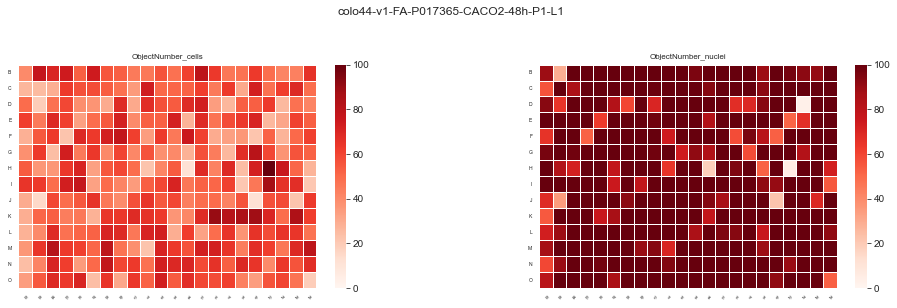

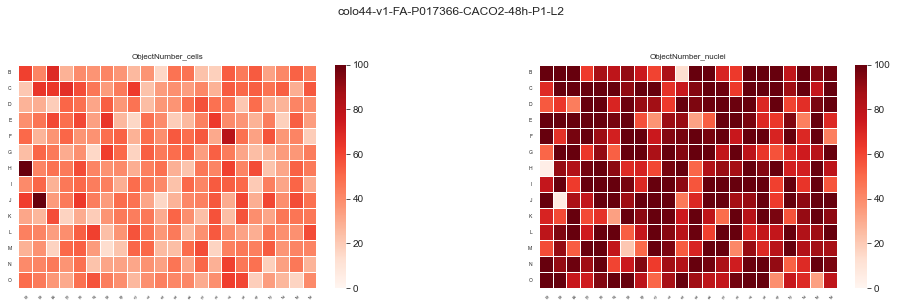

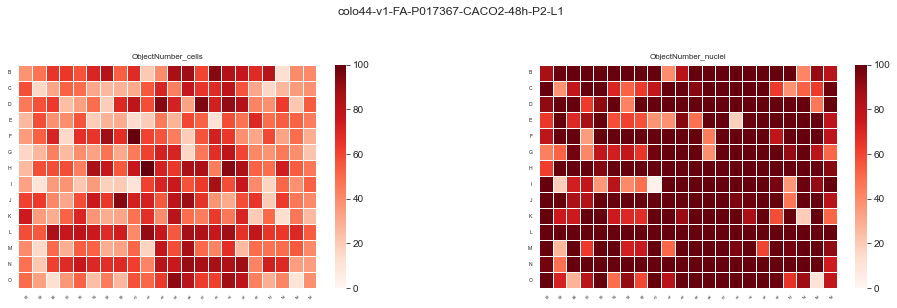

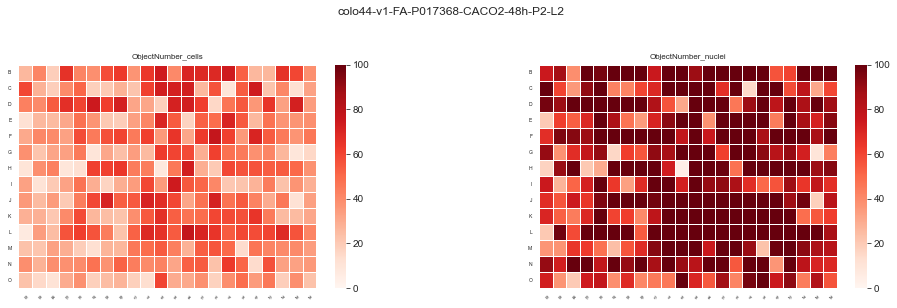

In [85]:
for OnePlate in listOfPlates:
    dfPart= df[df['plate_id'] == OnePlate]
    fig = plt.figure(figsize = HeatmapSize)
    fig.suptitle('{}'.format(OnePlate)  , fontsize = 12, y=1.1)
    n = 1
    for feature in FeaturesToPlot[:]:
        HeatmapFor = feature
        OneFeature = dfPart[[HeatmapFor, 'well_id']]
        dictOfnumeric = {HeatmapFor : np.median} # or np.median
        groupedby = OneFeature.groupby('well_id').agg(dictOfnumeric)
        groupedby

        for W in Wells:
            if W not in groupedby.index:
                groupedby.loc[W] = 0
        groupedby.sort_index(inplace=True)

        groupedbyvalues = groupedby[HeatmapFor].values.copy()
        groupedbyvalues.resize(NrOfRows,int(NrOfColumns))
        groupedbydf = pd.DataFrame(groupedbyvalues)
        groupedbydf.columns = Columns
        groupedbydf.index = Rows
        
        vmed = math.ceil(groupedby[HeatmapFor].quantile(0.5)*1000)/1000
        v05 = math.ceil(groupedby[HeatmapFor].quantile(0.05)*1000)/1000
        v95 = math.ceil(groupedby[HeatmapFor].quantile(0.95)*1000)/1000
        vmin = 0 #math.floor(groupedby[HeatmapFor].quantile(0.05)*1000)/1000

        ax = fig.add_subplot(Ro, Co , n)
        ax = sns.heatmap(groupedbydf, cmap=cmap,
                                     vmin = 0,
                                     #vmax = vmed * 3,
                                     vmax = 100, # when taking in more plates, the vmed*3 didn't work for my plates anymore... 
                                     square = False,
                                     linewidths = .5,
                                     xticklabels = 1, yticklabels = groupedbydf.index,
                                     #cbar_kws = {'ticks': [v05, vmed, v95]}
                                     )
        plt.yticks(fontsize=5,rotation=0)
        plt.xticks(fontsize=4,rotation= -45) 

        ax.set_title(HeatmapFor, fontsize = 8, loc = 'center')
        plt.subplots_adjust(  wspace = wspace, hspace = hspace, top = top)
        n += 1

    fig.savefig('{}/Heatmaps_{}_cmap_{}.{}'.format(OutputDir, OnePlate, cmap, figformat),  dpi=dpi, bbox_inches='tight')